# Regressão Linear Múltipla

## Carregando o Dataset Boston Houses

1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-residential acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per 10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. TARGET: Median value of owner-occupied homes in $1000's

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets import load_boston
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
%matplotlib inline 

In [2]:
# Gerando o dataset
boston = load_boston() 
dataset = pd.DataFrame(boston.data, columns = boston.feature_names)
dataset['target'] = boston.target

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [4]:
len(dataset)

506

In [5]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [6]:
dataset.describe()['target'] # variável preditora ou Classe ou Label

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
target     506 non-null float64
dtypes: float64(14)
memory usage: 55.4 KB


## Gerando número de observações e variáveis

In [8]:
observations = len(dataset)
variables = dataset.columns[:-1]
observations

506

## Coletando x e y

In [9]:
X = dataset.iloc[:,:-1]
y = dataset['target'].values

In [10]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [11]:
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

### Matriz de Correlação

In [12]:
# Gerando a matriz
X = dataset.iloc[:,:-1]
matriz_corr = X.corr()
print (matriz_corr)

             CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.199458  0.404471 -0.055295  0.417521 -0.219940  0.350784   
ZN      -0.199458  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.404471 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055295 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.417521 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219940  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.350784 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.377904  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.622029 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.579564 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.288250 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.377365  0.175520 

In [13]:
type(X)

pandas.core.frame.DataFrame

In [14]:
# matriz de Correlação com a variável preditora
mt = pd.DataFrame(dataset.values, columns=dataset.columns)
mt_corr = mt.corr()
print (abs(mt_corr['target']).sort_values(ascending=False))

target     1.000000
LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.385832
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: target, dtype: float64


## Visualizando a matriz de correlação (somente os atributos)

In [15]:
# Criando um Correlation Plot
def visualize_correlation_matrix(data, hurdle = 0.0):
    R = np.corrcoef(data, rowvar = 0)
    R[np.where(np.abs(R) < hurdle)] = 0.0
    heatmap = plt.pcolor(R, cmap = mpl.cm.coolwarm, alpha = 0.8)
    heatmap.axes.set_frame_on(False)
    heatmap.axes.set_yticks(np.arange(R.shape[0]) + 0.5, minor = False)
    heatmap.axes.set_xticks(np.arange(R.shape[1]) + 0.5, minor = False)
    heatmap.axes.set_xticklabels(variables, minor = False)
    plt.xticks(rotation=90)
    heatmap.axes.set_yticklabels(variables, minor = False)
    plt.tick_params(axis = 'both', which = 'both', bottom = 'off', top = 'off', left = 'off', right = 'off') 
    plt.colorbar()
    plt.show()

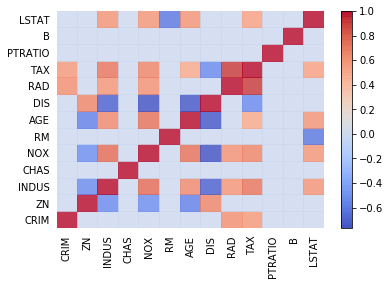

In [16]:
# Visualizando o Plot
visualize_correlation_matrix(X, hurdle = 0.5)

## Avaliando a Multicolinearidade

## Autovalores (Eigenvalues) e Autovetores (Eigenvectors)

Uma forma ainda mais automática de detectar associações multicolineares (e descobrir problemas numéricos em uma inversão de matriz) é usar autovetores. Explicados em termos simples, os autovetores são uma maneira muito inteligente de recombinar a variância entre as variáveis, criando novos recursos acumulando toda a variância compartilhada. Tal recombinação pode ser obtida usando a função NumPy linalg.eig, resultando em um vetor de autovalores (representando a quantidade de variância recombinada para cada nova variável) e autovetores (uma matriz nos dizendo como as novas variáveis se relacionam com as antigas).

In [17]:
# Gerando eigenvalues e eigenvectors
corr = np.corrcoef(X, rowvar = 0)
eigenvalues, eigenvectors = np.linalg.eig(corr)

Depois de extrair os autovalores, imprimimos em ordem decrescente e procuramos qualquer elemento cujo valor seja próximo de zero ou pequeno em comparação com os outros. Valores próximos a zero podem representar um problema real para equações normais e outros métodos de otimização baseados na inversão matricial. Valores pequenos representam uma fonte elevada, mas não crítica, de multicolinearidade. Se você detectar qualquer um desses valores baixos, anote a posição no vetor (lembre que os índices em Python começam por zero). 

O menor valor está na posição 8. Valor buscar a posição 8 no autovetor.

In [18]:
print (eigenvalues)

[6.12265476 1.43206335 1.24116299 0.85779892 0.83456618 0.65965056
 0.53901749 0.39654415 0.06351553 0.27743495 0.16916744 0.18616388
 0.22025981]


Usando a posição do índice na lista de autovalores, podemos encontrar o vetor específico nos autovetores que contém as variáveis carregadas, ou seja, o nível de associação com os valores originais. No eigenvector, observamos valores nas posições de índice 2, 8 e 9, que estão realmente em destaque em termos de valor absoluto.

In [19]:
print (eigenvectors[:,8])

[-0.04552843  0.08089873  0.25126664 -0.03590431 -0.04389033 -0.04580522
  0.03870705  0.01828389  0.63337285 -0.72024335 -0.02350903  0.00485021
 -0.02477196]


### Imprimir a lista dos Atributos e os Autovetores correspondentes <br /> Valores discrepantes (em módulo) representam que os valores são insignificantes

In [38]:
num_atributos = 13
vet_importancia_atributo = eigenvectors[:,8]
lista_atributo_valor = []
for i in range(num_atributos):
    lista_atributo_valor.append([i,vet_importancia_atributo[i]])
df = pd.DataFrame(lista_atributo_valor, columns=['Atributo', 'Importancia'])
df['Importancia'].map(abs).sort_values()

11    0.004850
7     0.018284
10    0.023509
12    0.024772
3     0.035904
6     0.038707
4     0.043890
0     0.045528
5     0.045805
1     0.080899
2     0.251267
8     0.633373
9     0.720243
Name: Importancia, dtype: float64

Os valores de indice 2, 8 e 9 são discrepantes.<br />
Agora nós imprimimos os nomes das variáveis para saber quais contribuem mais com seus valores para construir o autovetor.<br />Associamos o vetor de variáveis com o eigenvector.

In [39]:
print (variables[2], variables[8], variables[9])

INDUS RAD TAX


INDUS: proportion of non-residential acres per town<br />
RAD: index of accessibility to radial highways<br />
TAX: full-value property-tax rate per 10,000

Tendo encontrado os culpados da multicolinearidade, o que devemos fazer com essas variáveis? A remoção de algumas delas é geralmente a melhor solução.

## Feature Scaling

Podemos aplicar Feature Scaling através de Padronização ou Normalização. <br />Normalização aplica escala aos dados com intervalos entre 0 e 1. <br />A Padronização divide a média pelo desvio padrão para obter uma unidade de variância. <br />Vamos usar a Padronização (StandardScaler) pois nesse caso esta técnica ajusta os coeficientes e torna a superfície de erros mais "tratável".

### Aplicando Padronização

In [48]:
standardization = StandardScaler()
Xst = standardization.fit_transform(X)
original_means = standardization.mean_
originanal_stds = standardization.scale_
print('Dataset Original')
X.head()

Dataset Original


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [49]:
print('Dataset Padronizado')
dstd = pd.DataFrame(Xst, columns=boston.feature_names)
dstd.head()

Dataset Padronizado


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [51]:
y[:5]

array([24. , 21.6, 34.7, 33.4, 36.2])

### Desfazendo a Padronização

In [52]:
dfXst = pd.DataFrame(Xst, columns=boston.feature_names)
dfXst.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [53]:
Xinv = standardization.inverse_transform(Xst)
dfinverser = pd.DataFrame(Xinv, columns=boston.feature_names)
dfinverser.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [54]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Importância dos Atributos

In [55]:
# Criando um modelo
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [56]:
modelo.fit(X,y)
for coef, var in sorted(zip(map(abs, modelo.coef_), dataset.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))

17.796 NOX
 3.805 RM
 2.689 CHAS
 1.476 DIS
 0.953 PTRATIO
 0.525 LSTAT
 0.306 RAD
 0.107 CRIM
 0.046 ZN
 0.021 INDUS
 0.012 TAX
 0.009 B
 0.001 AGE


### Colocando os valores em Escala

In [57]:
standardization = StandardScaler()
Stand_coef_linear_reg = make_pipeline(standardization, modelo)

In [58]:
Stand_coef_linear_reg.fit(X,y)
for coef, var in sorted(zip(map(abs, Stand_coef_linear_reg.steps[1][1].coef_), dataset.columns[:-1]), reverse = True):
    print ("%6.3f %s" % (coef,var))

 3.749 LSTAT
 3.104 DIS
 2.671 RM
 2.659 RAD
 2.076 TAX
 2.062 PTRATIO
 2.060 NOX
 1.081 ZN
 0.920 CRIM
 0.857 B
 0.682 CHAS
 0.143 INDUS
 0.021 AGE


Observamos que a idade é o atributo de menor importância

### Avaliando o modelo com o R Squared (R²) 

In [59]:
modelo = linear_model.LinearRegression(normalize = False, fit_intercept = True)

In [60]:
def r2_est(X,y):
    return r2_score(y, modelo.fit(X,y).predict(X))

In [61]:
print ('R2: %0.3f' %  r2_est(X,y))

R2: 0.741


### Gera o impacto de cada atributo no R² 

In [62]:
r2_impact = list()
for j in range(X.shape[1]):
    selection = [i for i in range(X.shape[1]) if i!=j]
    r2_impact.append(((r2_est(X,y) - r2_est(X.values[:,selection],y)), dataset.columns[j]))
    
for imp, varname in sorted(r2_impact, reverse = True):
    print ('%6.3f %s' %  (imp, varname))

 0.057 LSTAT
 0.044 RM
 0.029 DIS
 0.028 PTRATIO
 0.011 NOX
 0.011 RAD
 0.006 B
 0.006 ZN
 0.006 TAX
 0.006 CRIM
 0.005 CHAS
 0.000 INDUS
 0.000 AGE


# Fazer Previsões

In [63]:
dataset.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


In [64]:
#             CRIM	  ZN  INDUS	  CHAS	 NOX   RM	 AGE	DIS	  RAD	  TAX	 PTRATIO	B	   LSTAT
Xteste = [   0.00,   0.2, 7.01,   0.0,   0.5,  7.1,  45.2,  6.1,  3.0,    222,   15.2,      396.1,   5.4
    ]
m = modelo.fit(X,y)
m.predict(np.array(Xteste).reshape(1, -1))

array([30.36435375])

In [65]:
Xteste = [
    [   0.02,   0.2, 7.01,   0.0,   0.5,  7.1,  45.2,  6.1,  3.0,    222,   15.2,      396.1,   5.4],
    [   0.01,   0.1,11.01,   0.0,   0.6,  6.1,  80.2,  2.5,  1.0,    273,   21.2,      396.9,   12.6],
]
m = modelo.fit(X,y)
m.predict(np.array(Xteste))

array([30.36221034, 19.46004017])

## Exercício: Gerar o modelo com os dados em escala, fazer previsões e mostrar o R²